[[0.10667615 0.11473686 0.13221275 0.16895435 0.2414415  0.36803037
  0.54814068 0.74116003 0.89223209 0.97836824]
 [0.11473686 0.13221275 0.16895435 0.2414415  0.36803037 0.54814068
  0.74116003 0.89223209 0.97836824 1.00514825]]


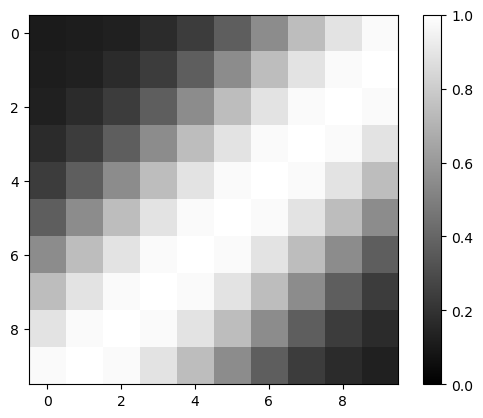

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# -1 ~ 1 까지 0.2 간격으로 10개
x = np.arange(-1.0, 1.0, 0.2)
y = np.arange(-1.0, 1.0, 0.2)

# 출력을 저장하는 10X10 그리드
z = np.zeros((10,10))

# 가중치
w_im = np.array([[4.0, 4.0], [4.0, 4.0]])   # hidden layer에 사용할 가중치 행렬
w_mo = np.array([[1.0], [-1.0]])            # output layer에 사용할 가중치 행렬

# 편향
b_im = np.array([3.0, -3.0])    # 은닉층
b_mo = np.array([0.1])          # 출력층

# 은닉층
def hidden_layer(x, w, b):
    u = np.dot(x, w) + b # 행렬곱셈
    return 1/(1+np.exp(-u)) # 활성화함수(시그모이드 함수)

# 출력층
def outplut_layer(x, w, b):
    u = np.dot(x, w) + b
    return u # 활성화함수(항등함수)

# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):

        # 순전파
        inp = np.array([x[i], y[j]])            # 입력층
        hid = hidden_layer(inp, w_im, b_im)     # 은닉층
        out = outplut_layer(hid, w_mo, b_mo)    # 출력층

        # 그리드맵에 신경망 출력 값 저장
        z[j][i] = out[0]

print(z[:2])
# 그리드맵으로 표시
plt.imshow(z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

In [2]:
#인위적으로 만든 나이와 키 데이터로 나이와 키의 상관관계를 분석하는 회귀분석 실습
import numpy as np

# 데이터 생성
np.random.seed(seed=1) # 난수 고정
X_min = 4 # X의 하한
X_max = 30 # X의 상한
X_n = 16

# 랜덤으로 만든 나이 데이터
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
# 랜덤으로 만든 신장 데이터
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.rand(X_n)

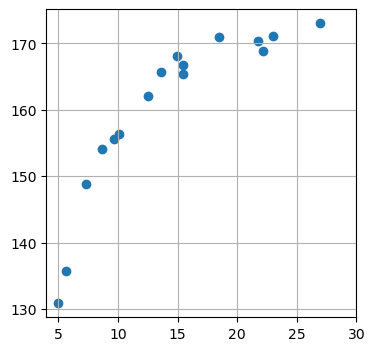

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(X, T, marker='o')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

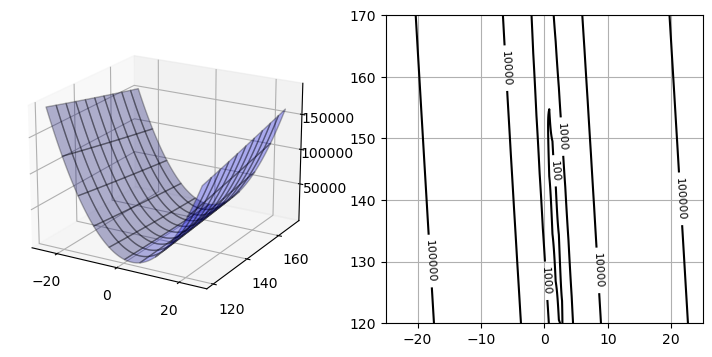

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# 평균제곱오차 함수
# x 나이, t 키, w 기울기와 편차
def mse(x, t, w):
    # 예측값: x에 기울기를 곱하고 편차를 더한 값
    y = w[0] * x + w[1]
    return np.mean((y - t)**2)

xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
# 직사각형 격자를 만들고
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
    # 평균제곱오차를 계산하여 리스트에 저장
        J[i1, i0] = mse(X, T, (x0[i0], x1[i1]))

plt.figure(figsize=(9, 4))
# 3d 차트
ax = plt.subplot(1, 2, 1, projection = '3d') # 1행 2열 중 첫번째 서브플롯
# rstride : row stride 행방향 이동, cstride : column stride 열뱡향 이동
# 곡면플롯
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2) #1행 2열 중 두번째 서브플롯
#등고선
cont = plt.contour(xx0, xx1, J, 30, colors='black',
 levels=[100, 1000, 10000, 100000])
#등고선 플롯의 고도각(Elevation)에 레이블 지정
cont.clabel(fmt='%d', fontsize=8)
plt.grid(True)
plt.show()
# 왼쪽 그래프 : 평균 제곱 오차는 계곡 모양, 기울기의 변화에 따라 평균제곱오차가 크게 바뀜
# 오른쪽 그래프 : 기울기의 변화에 따라 등고선의 간격으로 오차를 확인할 수 있음, 계곡의 최저점은 135 근처

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), T)

LinearRegression()

In [8]:
print("예측:", lin_reg.predict(X.reshape(-1,1)))
print('실제:', T)

예측: [161.89785247 174.49454332 144.58293841 157.13459674 150.67322092
 148.413174   152.31390549 158.92993874 161.05664586 166.95620382
 161.98808066 173.03657064 153.06945315 181.0479644  145.71564359
 172.42389429]
실제: [166.73091891 171.15092097 130.85328273 162.03001889 154.12848956
 148.83395506 155.59807339 165.71011968 168.0409406  170.89244154
 165.45522877 168.86442284 156.38489128 173.02016611 135.74700684
 170.29374933]


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred = lin_reg.predict(X.reshape(-1,1))
# 평균제곱오차
lin_mse = mean_squared_error(T, pred)
print(lin_mse)

# 평균제곱근오차
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

# 평균절대오차
lin_mae = mean_absolute_error(T, pred)
print(lin_mae)

36.80816752687644
6.066973506360188
5.171500728283721


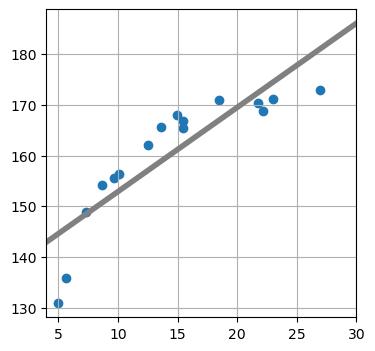

In [10]:
from scipy import stats
slope,intercept,r_value,p_value,stderr=stats.linregress(X, T)
slope,intercept,r_value,p_value,stderr

# 회귀선 표시
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

plt.figure(figsize=(4, 4))
W=np.array([slope, intercept])
show_line(W)
plt.scatter(X, T, marker='o')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()